<a href="https://colab.research.google.com/github/pushkal1234/Image-Colour_RGB_Detection/blob/main/IISERB_Image_Colour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Color Identification using Machine Learning**

In this notebook, I have used machine learning algorithm, KMeans, to extract colors from a give image. I will use OpenCV2 for image manipulation, apply KMeans to identify the major colors and then plot the information using Matplotlib.

**Import libraries**

Let's first import necessary libraries. We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs, numpy to work with arrays, cv2 to work with image data, collections to use Counter to count values, rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

**Working with OpenCV**

In this Project we will be Dealing with Mobile Images of lush Green Beautiful Campus of IISER Bhopal.  

The type of this input is <class 'numpy.ndarray'>
Shape: (300, 400, 3)


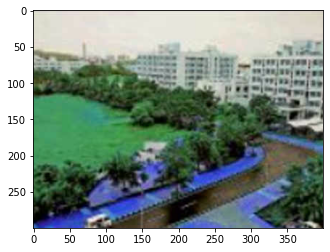

In [ ]:
image = cv2.imread('Image2.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

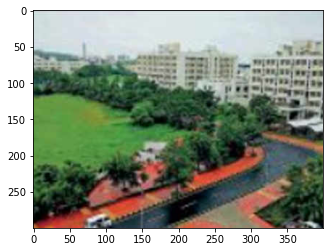

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

So, This one is our Original Image after getting converted from BGR To RGB. 

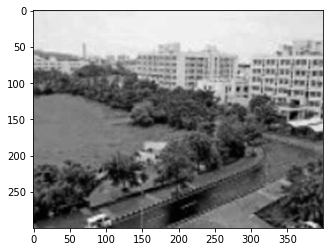

In [ ]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions

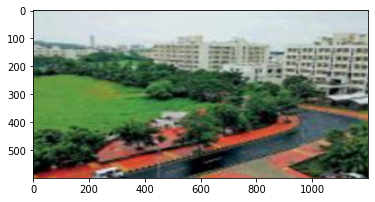

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

**Color Identification**

As we Know about OpenCV, let's start identifying colors from an image.

First, we will define a function that can give us the hex values of our the colors that we will identify.

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

I have combined all the steps in two method.

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 91.56117081, 149.09348463,  67.395694  ]),
 array([212.63505478, 223.5683823 , 225.99078652]),
 array([48.31939397, 69.53938784, 49.27024128]),
 array([135.11209896, 137.79109221, 123.8662114 ]),
 array([183.13023448,  94.37765046,  75.08759081]),
 array([80.04071598, 96.30872785, 79.37540851]),
 array([17.56269804, 28.35400824, 18.29400349]),
 array([172.64304359, 180.57408858, 170.52136083])]

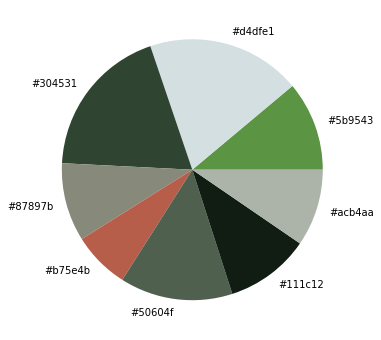

In [ ]:
get_colors(get_image('Image2.jpg'), 8, True)

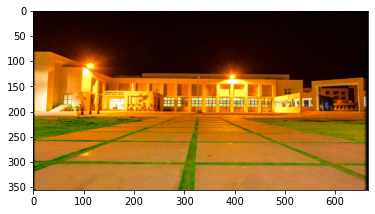

In [29]:
plt.imshow(cv2.cvtColor(cv2.imread('Image1.png'),cv2.COLOR_BGR2RGB))

Now we will be dealing with another Mobile Image of IISER Bhopal Campus, 'Image1.png' 

[array([192.48583033, 100.65491246,   3.41216653]),
 array([22.48450519,  2.94989414,  1.11917939]),
 array([248.2399506 , 218.14260049,  75.23916461]),
 array([115.12864604,  50.29337083,   4.88830856]),
 array([245.00136687, 233.6656643 , 187.31848004]),
 array([198.34626223, 127.99501164,  50.72536012]),
 array([243.37310088, 134.63178416,   3.09317438]),
 array([106.1040984 , 113.5693316 ,   4.54567491])]

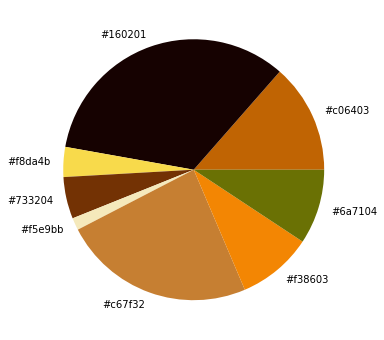

In [27]:
get_colors(get_image('Image1.png'), 8, True)

Above Mentioned Pie Chart shows the Extracted Colour of Input Image.

It shoes the Maximum Content of Black Colour as due to Colour of sky during Night

Now we will deal with Third Sample Image at Morning in Bhopal Campus.

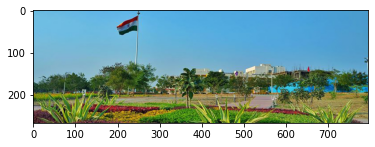

In [30]:
plt.imshow(cv2.cvtColor(cv2.imread('Image3.jpg'),cv2.COLOR_BGR2RGB))

[array([117.61089146, 182.13388978, 213.2704642 ]),
 array([77.12128751, 81.82658218, 42.82110092]),
 array([153.23211706, 147.93904655,  71.53488047]),
 array([36.42470627, 56.57330796, 26.68004302]),
 array([ 83.69455374, 117.01801615, 106.98343342]),
 array([103.70669151, 130.06647668,  35.19384008]),
 array([166.61730769, 167.42307692, 138.4951049 ]),
 array([ 83.15405593, 167.12881971, 217.03076401])]

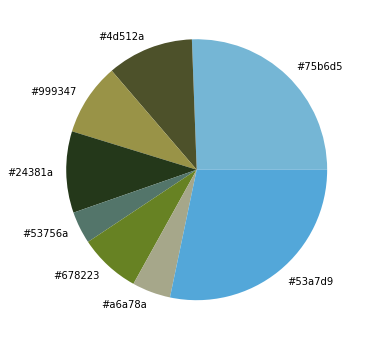

In [31]:
get_colors(get_image('Image3.jpg'), 8, True)

Above Mentioned Pie Chart shows the Extracted Colour of Input Image.

It shoes the Maximum Content of Blue Colour as due to Colour of sky during Morning.

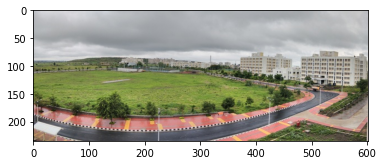

In [33]:
plt.imshow(cv2.cvtColor(cv2.imread('Image4.jfif'),cv2.COLOR_BGR2RGB))

This is Fourth Image for our test set and we will be extracting colour from this and represent it via Pie Chart

[array([127.49811243, 143.95899054,  69.68932616]),
 array([180.74051697, 181.58664523, 182.91574746]),
 array([55.46519846, 60.40194622, 37.90115237]),
 array([158.87168675, 158.72894578, 157.87153614]),
 array([89.67701554, 92.69053064, 73.60856054]),
 array([213.03008838, 146.97212113, 133.62353782]),
 array([208.25017832, 208.49573901, 210.36366708]),
 array([130.79409039, 119.4039143 , 111.44594668])]

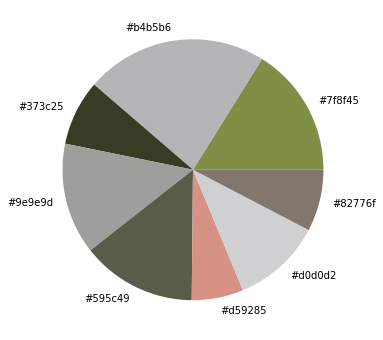

In [34]:
get_colors(get_image('Image4.jfif'), 8, True)

**Search images using Color**

From the model above, we can extract the major colors. This create the opportunity to search for images based on certain colors. We can select a color and if it's hex matches or is close to the hex of the major colors of the image, we say it's a match.

We first get all the images and store them in the images variable.

In [19]:
IMAGE_DIRECTORY = '/content/sample_data/Images_IISERB'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

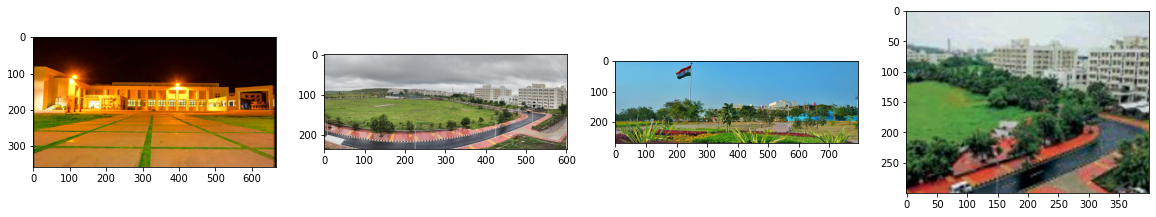

In [20]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

We define the function below. We will try to match with the top 10 colors of the image. It is highly possible that there will be no extact match for the hex codes, thus we calculate the similarity between the chosen color and the colors of the image.

We keep a threshold value such that if the difference between the chosen color and any of the selected colors is less than that threshold, we declare it as a match.

Hex values or RGB values cannot be directly compared so we first convert them to a device independant and color uniform space. We use rgb2lab to convert the values and then find the difference using deltaE_cie76. The method calculates the difference between all top 5 colors of the image and the selected color and if atleast one is below the threshold, we show the image.

In [22]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

We call the above method for all the images in our set and show relevant images out of the same that approximately match our selected color.

In [23]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

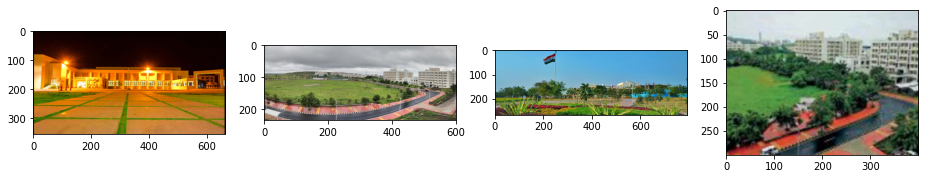

In [24]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

In [25]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

<Figure size 1440x720 with 0 Axes>

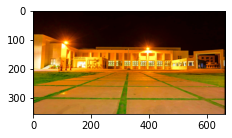

In [26]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)


**Conclusion**

In this notebook, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.